# GTEx clustering analysis

In [38]:
library(here)
library(dplyr)
library(Rtsne)
library(ggplot2)
library(scales)
set.seed(123)

In [39]:
gtex_plier2 <- readRDS(here('output/gtex/gtex_PLIER2.rds'))

In [40]:
gtex_B  <- data.frame(as.matrix(gtex_plier2$B))

In [41]:
head(gtex_B)

GTEX.1117F.0226.SM.5GZZ7 GTEX.1117F.0426.SM.5EGHI GTEX.1117F.0526.SM.5EGHJ
LV1  0.059449495             -0.157660594              0.41945902             
LV2  0.024647632             -0.069506978             -0.03927263             
LV3  0.001745996             -0.164543763              0.26281525             
LV4 -0.030103405             -0.007088976             -0.02412439             
LV5 -0.266252622             -0.332131300             -0.39778680             
LV6  0.105200849             -0.017466987              0.08719982             
    GTEX.1117F.0626.SM.5N9CS GTEX.1117F.0726.SM.5GIEN GTEX.1117F.1326.SM.5EGHH
LV1  0.32562436               0.05399605              -0.12757005             
LV2  0.06580254               0.02507455               0.07497131             
LV3  0.09615976               0.28775519               0.87790287             
LV4 -0.03070101              -0.01030226               0.04757672             
LV5 -0.25790455               0.16385956              -0.23529447             
LV6  0.04069410              -0.12607696              -0.09013901             
    GTEX.1117F.2426.SM.5EGGH GTEX.1117F.2526.SM.5GZY6 GTEX.1117F.2826.SM.5GZXL
LV1  0.10439109              -0.15271585              -0.103412405            
LV2  0.11967017               0.05680829               0.074638258            
LV3 -0.01135481               0.12534965               0.293755692            
LV4 -0.02888953              -0.05948635              -0.058873693            
LV5 -0.23104312               0.12040320              -0.183396378            
LV6  0.09270272              -0.01672574              -0.002047877            
    GTEX.1117F.2926.SM.5GZYI ⋯ GTEX.ZZPU.1126.SM.5N9CW GTEX.ZZPU.1226.SM.5N9CK
LV1 -0.08526571              ⋯  0.116236290            -0.10269113            
LV2  0.05380043              ⋯ -0.036538189            -0.08268311            
LV3 -0.11067616              ⋯ -0.008751971            -0.05602059            
LV4 -0.03254389              ⋯ -0.027701068            -0.05825118            
LV5 -0.14096004              ⋯  0.550067001             0.21607662            
LV6 -0.07069843              ⋯ -0.130224455            -0.08737340            
    GTEX.ZZPU.1326.SM.5GZWS GTEX.ZZPU.1426.SM.5GZZ6 GTEX.ZZPU.1826.SM.5E43L
LV1  0.10244273             -0.10777651             -0.04678458            
LV2 -0.02050416             -0.03650432             -0.04460744            
LV3  0.42797920              0.37534993             -0.04101079            
LV4 -0.02772065             -0.03185123             -0.04991498            
LV5  0.13027950              0.18418594              0.02035761            
LV6  0.04020525             -0.12147980             -0.04907285            
    GTEX.ZZPU.2126.SM.5EGIU GTEX.ZZPU.2226.SM.5EGIV GTEX.ZZPU.2426.SM.5E44I
LV1  0.21613528             -0.239800891             0.70461407            
LV2 -0.04375957             -0.004767715            -0.08815896            
LV3 -0.00912129              0.040197562            -0.06202747            
LV4 -0.11033416             -0.050303455            -0.06259047            
LV5 -0.17362448              0.184564640            -0.30362634            
LV6  0.01885870             -0.141264247            -0.02010885            
    GTEX.ZZPU.2626.SM.5E45Y GTEX.ZZPU.2726.SM.5NQ8O
LV1 -0.20576332              0.05461336            
LV2 -0.04758426              0.00358794            
LV3 -0.14657807              0.15536284            
LV4 -0.01519923             -0.04838368            
LV5  0.07145606             -0.02883381            
LV6 -0.10966572             -0.01358866

In [42]:
colnames(gtex_B) <- gsub("\\.", "-", colnames(gtex_B))

In [43]:
gtex_summary_sig  <- gtex_plier2$summary
#  %>% 
# dplyr::filter(FDR < 0.05)  %>% 
# dplyr::filter(AUC > 0.7)

head(gtex_summary_sig)

tail(gtex_summary_sig)

pathway                        LV  AUC       p-value      FDR         
1 Artery - Aorta Female 60-69 Up LV1 0.9909541 2.203697e-15 5.574661e-14
2 Artery - Aorta Male 50-59 Up   LV1 0.9953669 6.674579e-15 9.386126e-14
3 Artery - Aorta Female 20-29 Up LV1 0.9910400 2.179744e-15 5.574661e-14
4 Artery - Aorta Female 50-59 Up LV1 0.9880541 3.183981e-15 6.668281e-14
5 Artery - Aorta Male 30-39 Up   LV1 0.9941387 1.467544e-15 4.773775e-14
6 Artery - Aorta Female 30-39 Up LV1 0.9903604 2.376553e-15 5.628678e-14

pathway                                                     LV   
1345 Positive Regulation of miRNA Metabolic Process (GO:2000630) LV203
1346 TNF-alpha Signaling via NF-kB                               LV203
1347 Hypoxia                                                     LV203
1348 Adipose - Visceral (Omentum) Male 30-39 Up                  LV205
1349 Adipose - Visceral (Omentum) Male 20-29 Up                  LV205
1350 TNF-alpha Signaling via NF-kB                               LV205
     AUC       p-value      FDR         
1345 0.4647638 6.550760e-01 6.599646e-01
1346 0.6561348 1.415652e-04 1.835860e-04
1347 0.5447616 1.522072e-01 1.601557e-01
1348 0.6303226 1.271442e-02 1.433957e-02
1349 0.6762386 1.255146e-03 1.519684e-03
1350 0.6575529 4.377809e-05 5.904138e-05

In [44]:
gtex_meta <- read.table(
    here('data/gtex/GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt'), 
    sep = '\t', 
    header = TRUE,
    quote = "", 
    fill = TRUE,
    comment.char = "" 
)

In [45]:
head(gtex_meta)

SAMPID                        SMATSSCR SMCENTER
1 GTEX-1117F-0003-SM-58Q7G      NA       B1      
2 GTEX-1117F-0003-SM-5DWSB      NA       B1      
3 GTEX-1117F-0003-SM-6WBT7      NA       B1      
4 GTEX-1117F-0011-R10a-SM-AHZ7F NA       B1, A1  
5 GTEX-1117F-0011-R10b-SM-CYKQ8 NA       B1, A1  
6 GTEX-1117F-0226-SM-5GZZ7       0       B1      
  SMPTHNTS                                     SMRIN SMTS          
1                                               NA   Blood         
2                                               NA   Blood         
3                                               NA   Blood         
4                                               NA   Brain         
5                                              7.2   Brain         
6 2 pieces, ~15% vessel stroma, rep delineated 6.8   Adipose Tissue
  SMTSD                        SMUBRID SMTSISCH SMTSPAX ⋯ SME1ANTI SMSPLTRD
1 Whole Blood                  0013756 1188       NA    ⋯       NA       NA
2 Whole Blood                  0013756 1188       NA    ⋯       NA       NA
3 Whole Blood                  0013756 1188       NA    ⋯       NA       NA
4 Brain - Frontal Cortex (BA9) 0009834 1193       NA    ⋯       NA       NA
5 Brain - Frontal Cortex (BA9) 0009834 1193       NA    ⋯       NA       NA
6 Adipose - Subcutaneous       0002190 1214     1125    ⋯ 14648800 11999300
  SMBSMMRT   SME1SNSE SME1PCTS SMRRNART   SME1MPRT SMNUM5CD SMDPMPRT SME2PCTS
1         NA       NA      NA          NA      NA  NA       NA            NA 
2         NA       NA      NA          NA      NA  NA       NA            NA 
3         NA       NA      NA          NA      NA  NA       NA            NA 
4         NA       NA      NA          NA      NA  NA       NA            NA 
5         NA       NA      NA          NA      NA  NA       NA            NA 
6 0.00315785 14669500 50.0354  0.00310538 0.99474  NA        0       50.1944

In [46]:
table(colnames(gtex_B) %in% gtex_meta$SAMPID)


 TRUE 
17382 

In [47]:
tissues_to_keep <- names(table(gtex_meta$SMTS)[table(gtex_meta$SMTS) >= 200])

gtex_meta_filtered <- gtex_meta %>% dplyr::filter(SMTS %in% tissues_to_keep)

table(gtex_meta_filtered$SMTS)


Adipose Tissue  Adrenal Gland          Blood   Blood Vessel    Bone Marrow 
          1327            275           3480           1473            217 
         Brain         Breast          Colon      Esophagus          Heart 
          3326            480            821           1582           1141 
         Liver           Lung         Muscle          Nerve       Pancreas 
           251            867           1132            722            360 
     Pituitary       Prostate           Skin         Spleen        Stomach 
           301            262           2014            260            381 
        Testis        Thyroid 
           406            812 

In [48]:
gtex_B <- gtex_B %>%
    dplyr::select(any_of(gtex_meta_filtered$SAMPID))

# T-SNE of GTEx samples

In [49]:
# Use gtex_B

mat_jitter <- jitter(t(gtex_B), factor = 1e-6)
tsne_res <- Rtsne(mat_jitter, perplexity = 30, max_iter = 1000, verbose = TRUE, check_duplicates = FALSE)
tsne_df <- data.frame(
  sample_id = rownames(mat_jitter),
  tSNE_1    = tsne_res$Y[,1],
  tSNE_2    = tsne_res$Y[,2]
) %>%
  left_join(
    gtex_meta_filtered %>% select(SAMPID, SMTS) %>% rename(sample_id = SAMPID, tissue = SMTS),
    by = "sample_id"
  )
tsne_centroids <- tsne_df %>%
  group_by(tissue) %>%
  summarise(tSNE_1 = mean(tSNE_1), tSNE_2 = mean(tSNE_2))

Performing PCA
Read the 16417 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 10000 of 16417
Done in 5.23 seconds (sparsity = 0.007596)!
Learning embedding...
Iteration 50: error is 102.989950 (50 iterations in 2.00 seconds)
Iteration 100: error is 89.194115 (50 iterations in 2.17 seconds)
Iteration 150: error is 77.768403 (50 iterations in 2.08 seconds)
Iteration 200: error is 74.294626 (50 iterations in 2.04 seconds)
Iteration 250: error is 72.539787 (50 iterations in 2.02 seconds)
Iteration 300: error is 2.948367 (50 iterations in 1.88 seconds)
Iteration 350: error is 2.631073 (50 iterations in 1.79 seconds)
Iteration 400: error is 2.400723 (50 iterations in 1.77 seconds)
Iteration 450: error is 2.231023 (50 iterations in 1.76 seconds)
Iteration 500: error is 2.103067 (50 iterations in 1.76 seconds)
Iteration 550: error is 2.003242 (50 iterations in 

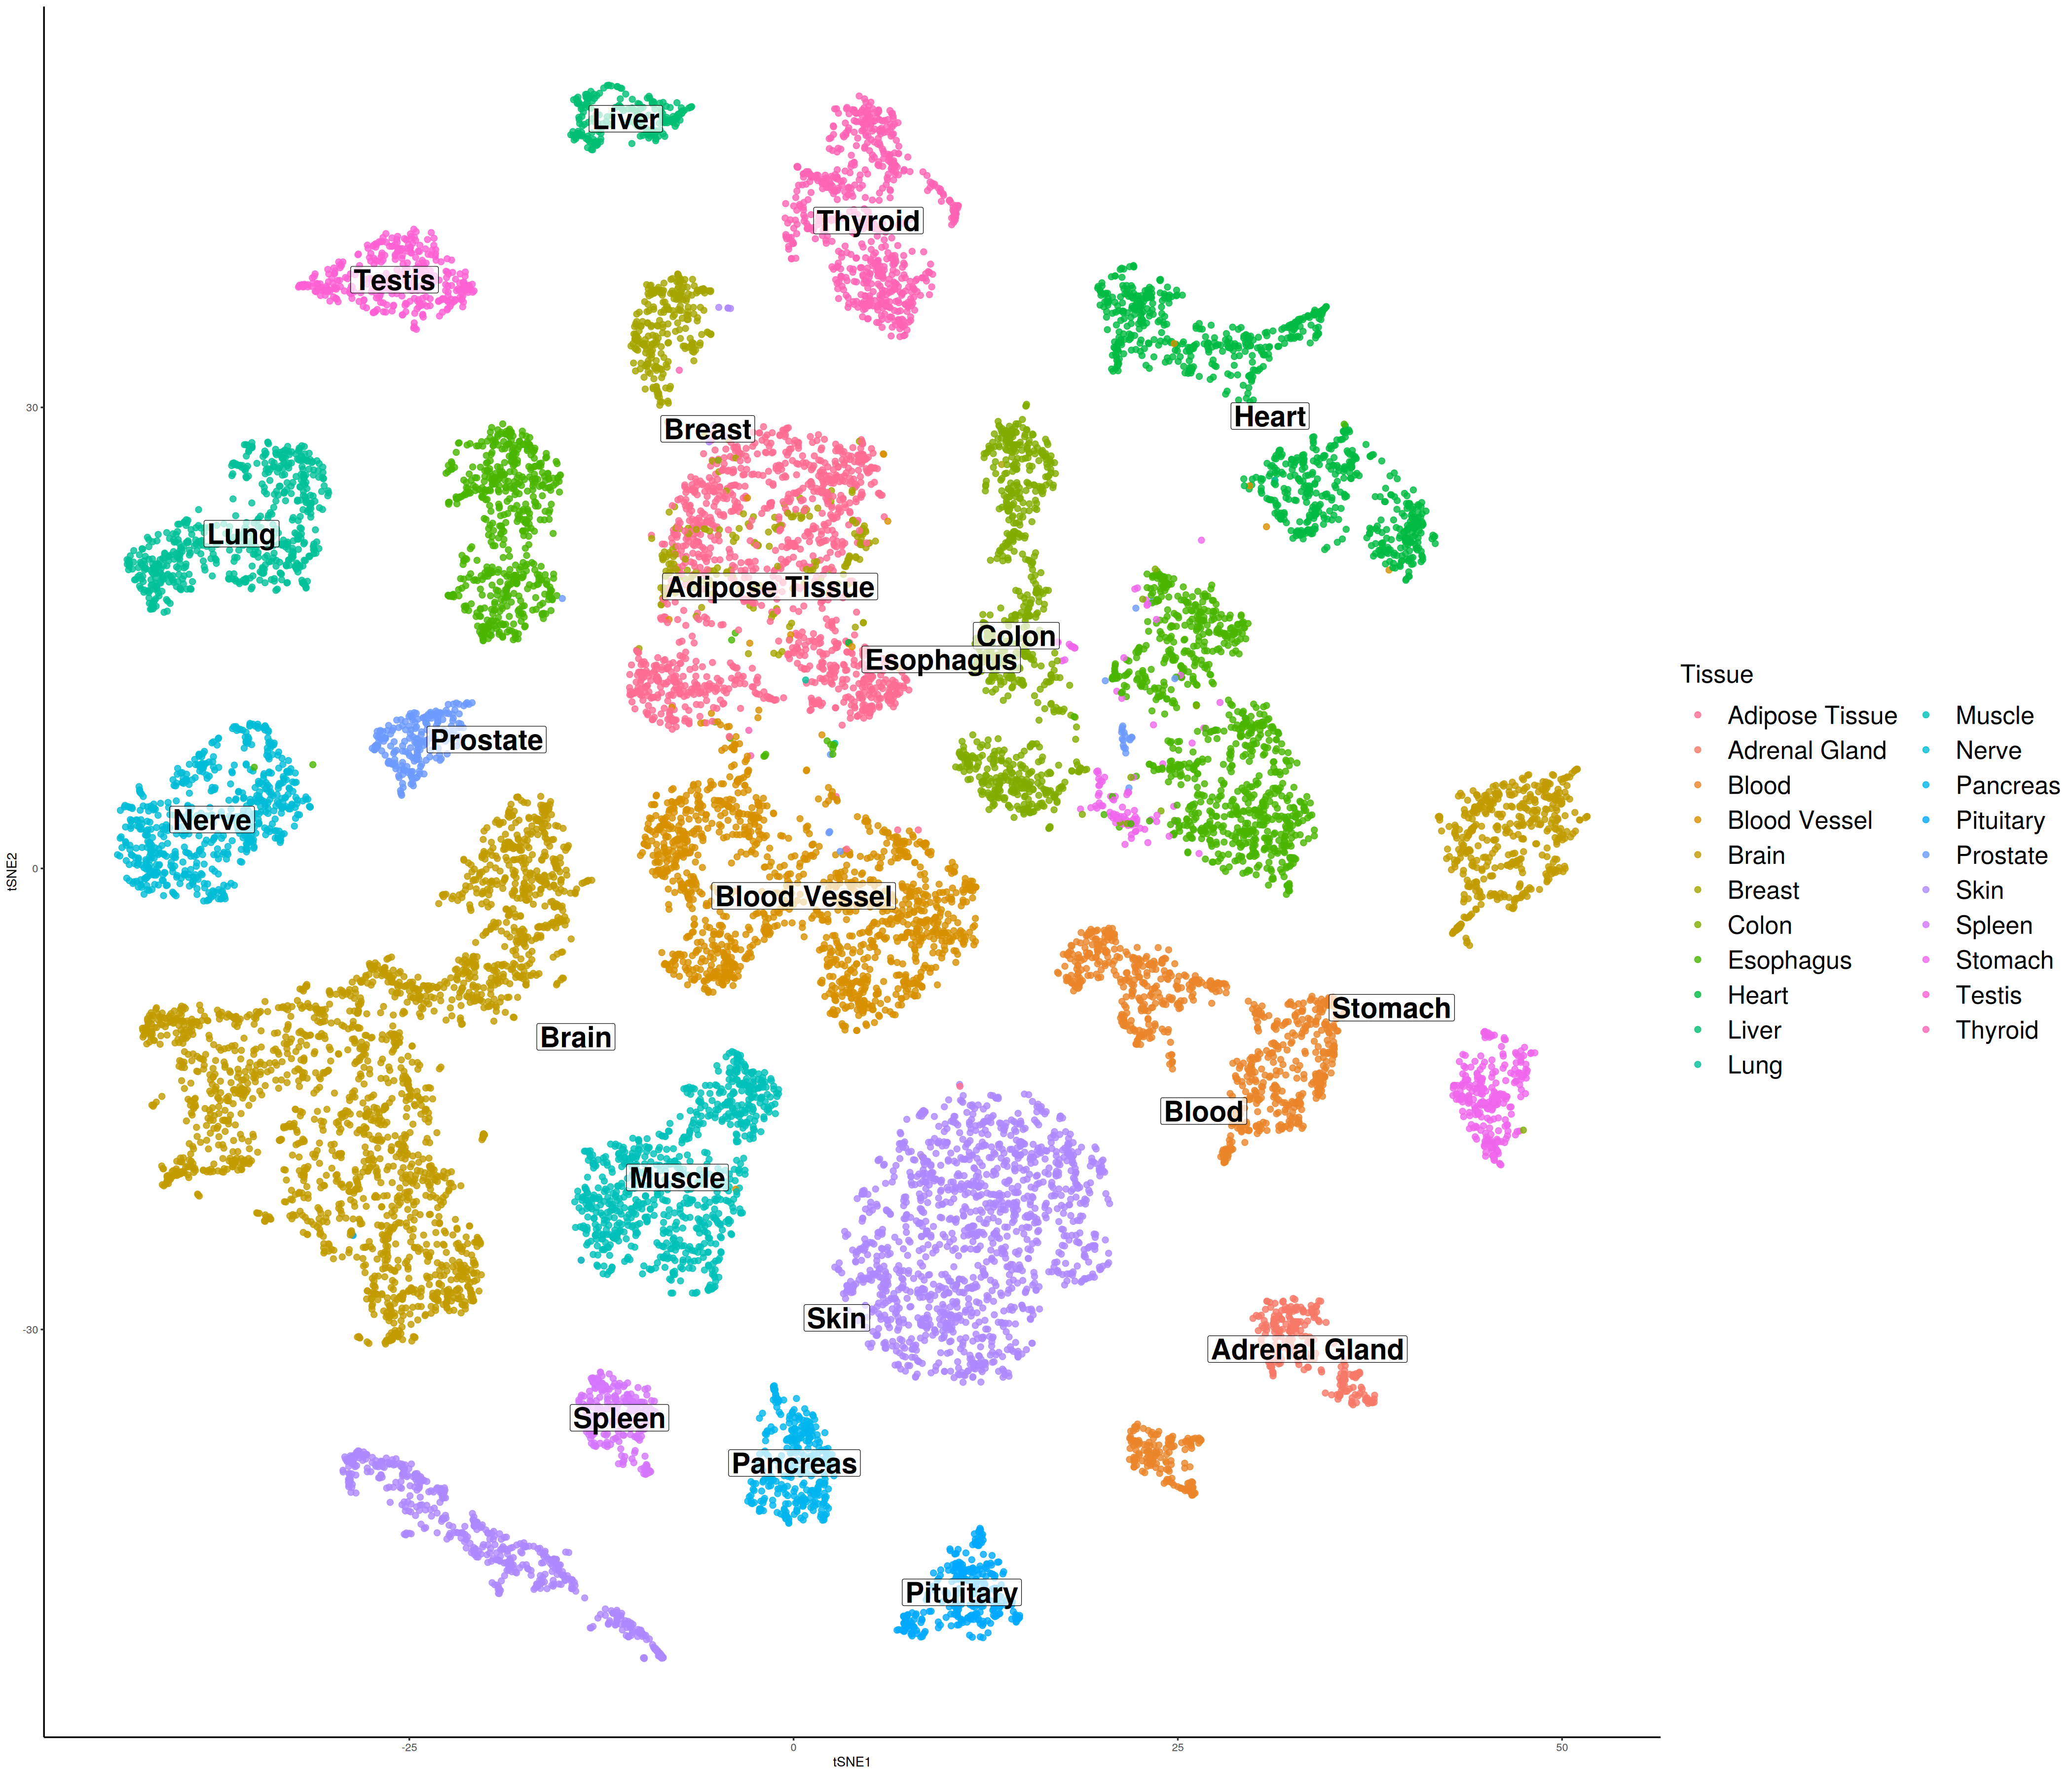

In [50]:
options(repr.plot.width = 35, repr.plot.height = 30)

n_tissues <- n_distinct(tsne_df$tissue)
palette_hue <- hue_pal(h = c(0, 360), c = 100, l = 65)(n_tissues)

ggplot(tsne_df, aes(tSNE_1, tSNE_2, colour = tissue)) +
  geom_point(size = 3, alpha = 0.8) +
  geom_label(
    data = tsne_centroids,
    aes(label = tissue),
    size = 12, fontface = "bold",
    colour = "black", fill = "white", alpha = 0.7
  ) +
  scale_color_manual(values = palette_hue) +
  labs(
    x = "tSNE1", y = "tSNE2", colour = "Tissue"
  ) +
  theme_classic(base_size = 16) +
  theme(
    legend.key.size = unit(1.5, "cm"),
    legend.text       = element_text(size = 30),
    legend.title      = element_text(size = 30)
  )


# Most important LVs for tissue

In [51]:
library(dplyr)

# 1. align metadata
meta <- gtex_meta %>%
  select(SAMPID, SMTS) %>%
  mutate(SAMPID = trimws(SAMPID)) %>% 
  slice(match(colnames(gtex_B), SAMPID))

# 2. for each tissue compute t‐stat for each LV
tissues <- unique(meta$SMTS)
best_LV_by_tissue <- sapply(tissues, function(tiss) {
  group <- meta$SMTS == tiss
  # compute |t| for each LV
  t_stats <- apply(gtex_B, 1, function(vals) {
    x1 <- vals[group]; x2 <- vals[!group]
    m1 <- mean(x1); m2 <- mean(x2)
    v1 <- var(x1);  v2 <- var(x2)
    n1 <- length(x1); n2 <- length(x2)
    numerator   <- m1 - m2
    denominator <- sqrt(v1/n1 + v2/n2)
    abs(numerator / denominator)
  })
  # return the LV with max |t|
  names(which.max(t_stats))
})

# 3. show results
best_LV_by_tissue  <- data.frame(best_LV_by_tissue)
colnames(best_LV_by_tissue) <- 'LV'
best_LV_by_tissue <-  best_LV_by_tissue  %>% 
tibble::rownames_to_column('tissue')

In [52]:
best_LV_by_tissue

tissue         LV   
1  Adipose Tissue LV29 
2  Muscle         LV47 
3  Blood Vessel   LV81 
4  Heart          LV35 
5  Breast         LV35 
6  Skin           LV31 
7  Brain          LV71 
8  Adrenal Gland  LV59 
9  Thyroid        LV195
10 Lung           LV187
11 Spleen         LV43 
12 Pancreas       LV25 
13 Esophagus      LV197
14 Stomach        LV56 
15 Colon          LV26 
16 Prostate       LV56 
17 Testis         LV76 
18 Nerve          LV101
19 Blood          LV187
20 Pituitary      LV35 
21 Liver          LV71

In [53]:
source(here("config.R"))
output_data_dir <- config$GTEx$DATASET_FOLDER
summ_all_summaries <- readRDS(file.path(output_data_dir, "all_summaries.rds"))

In [54]:
dplyr::left_join(best_LV_by_tissue, summ_all_summaries)

Joining with `by = join_by(LV)`


tissue         LV   
1  Adipose Tissue LV29 
2  Muscle         LV47 
3  Blood Vessel   LV81 
4  Heart          LV35 
5  Breast         LV35 
6  Skin           LV31 
7  Brain          LV71 
8  Adrenal Gland  LV59 
9  Thyroid        LV195
10 Lung           LV187
11 Spleen         LV43 
12 Pancreas       LV25 
13 Esophagus      LV197
14 Stomach        LV56 
15 Colon          LV26 
16 Prostate       LV56 
17 Testis         LV76 
18 Nerve          LV101
19 Blood          LV187
20 Pituitary      LV35 
21 Liver          LV71 
   pathway_prior                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
1  Chromosome_Location_chr6p12, GTEx_Tissues_V8_2023_Lung Male 60-69 Up, GTEx_Tissues_V8_2023_Lung Male 30-39 Up, GTEx_Tissues_V8_2023_Lung Female 50-59 Up, GTEx_Tissues_V8_2023_Lung Male 40-49 Up, GTEx_Tissues_V8_2023_Lung Female 20-29 Up, GTEx_Tissues_V8_2023_Lung Female 70-79 Up, Human_Gene_Atlas_Fetallung, Human_Gene_Atlas_Trachea                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
2  GO_Biological_Process_2025_Cellular Respiratio

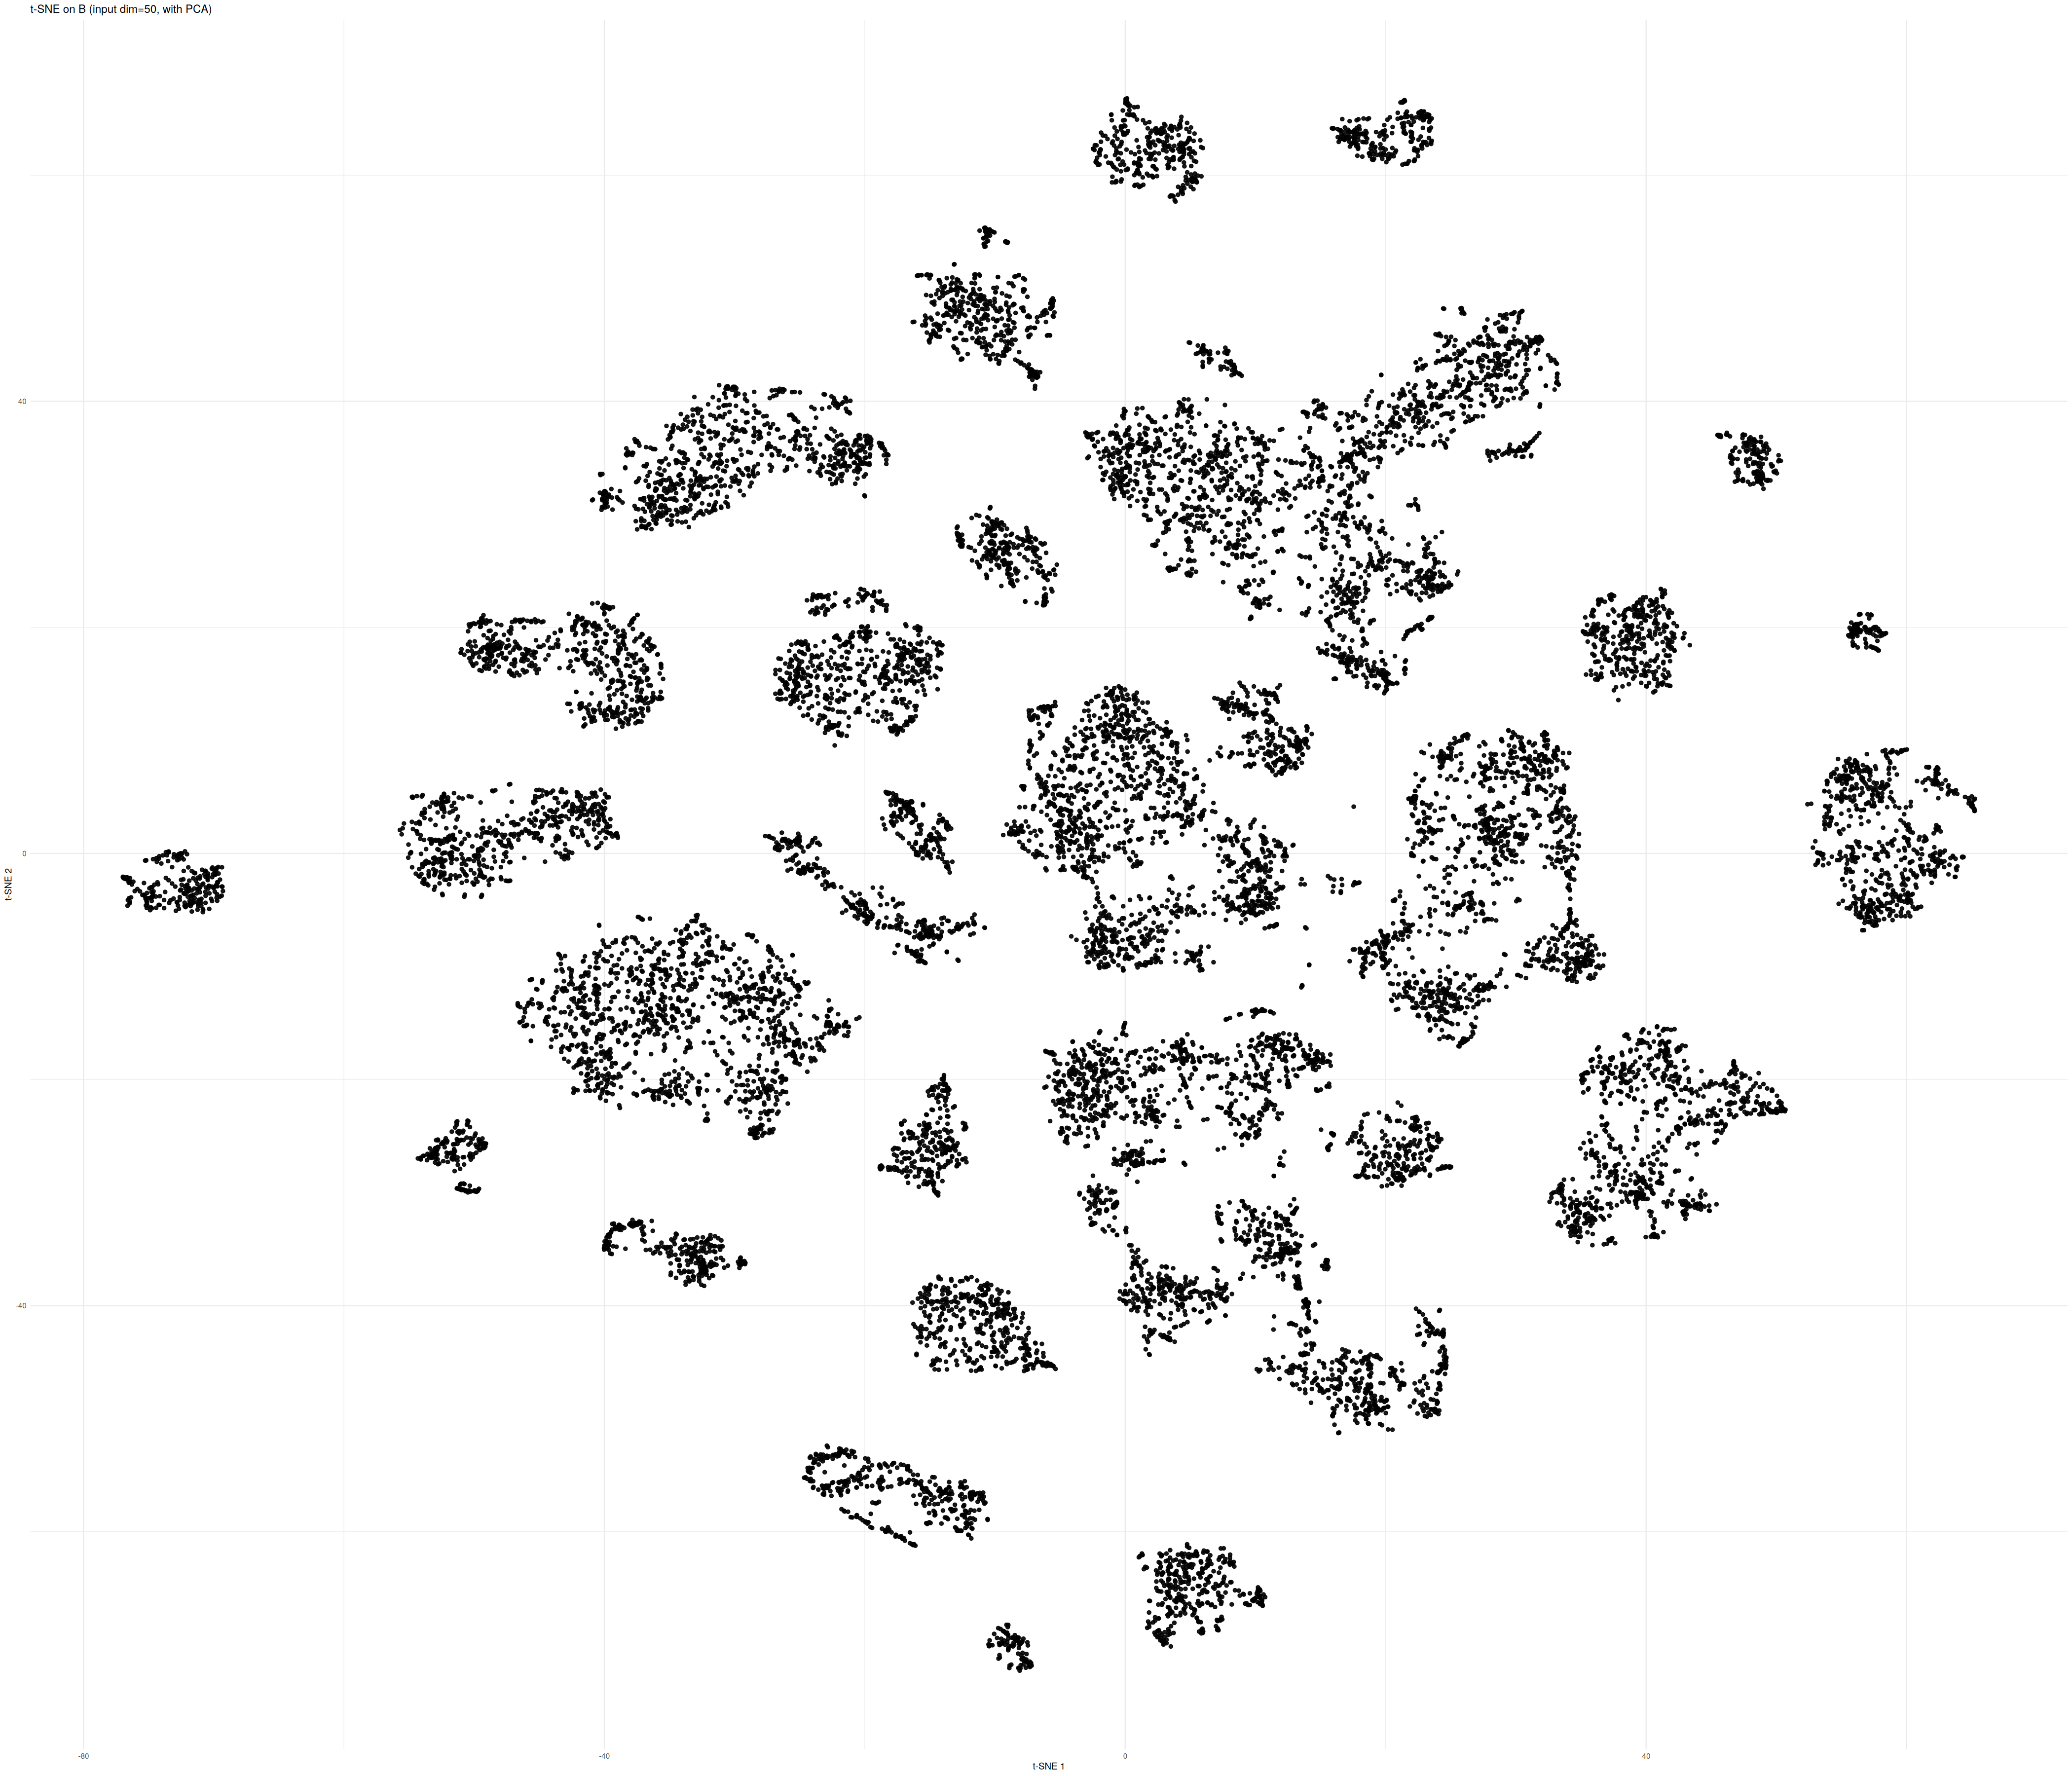

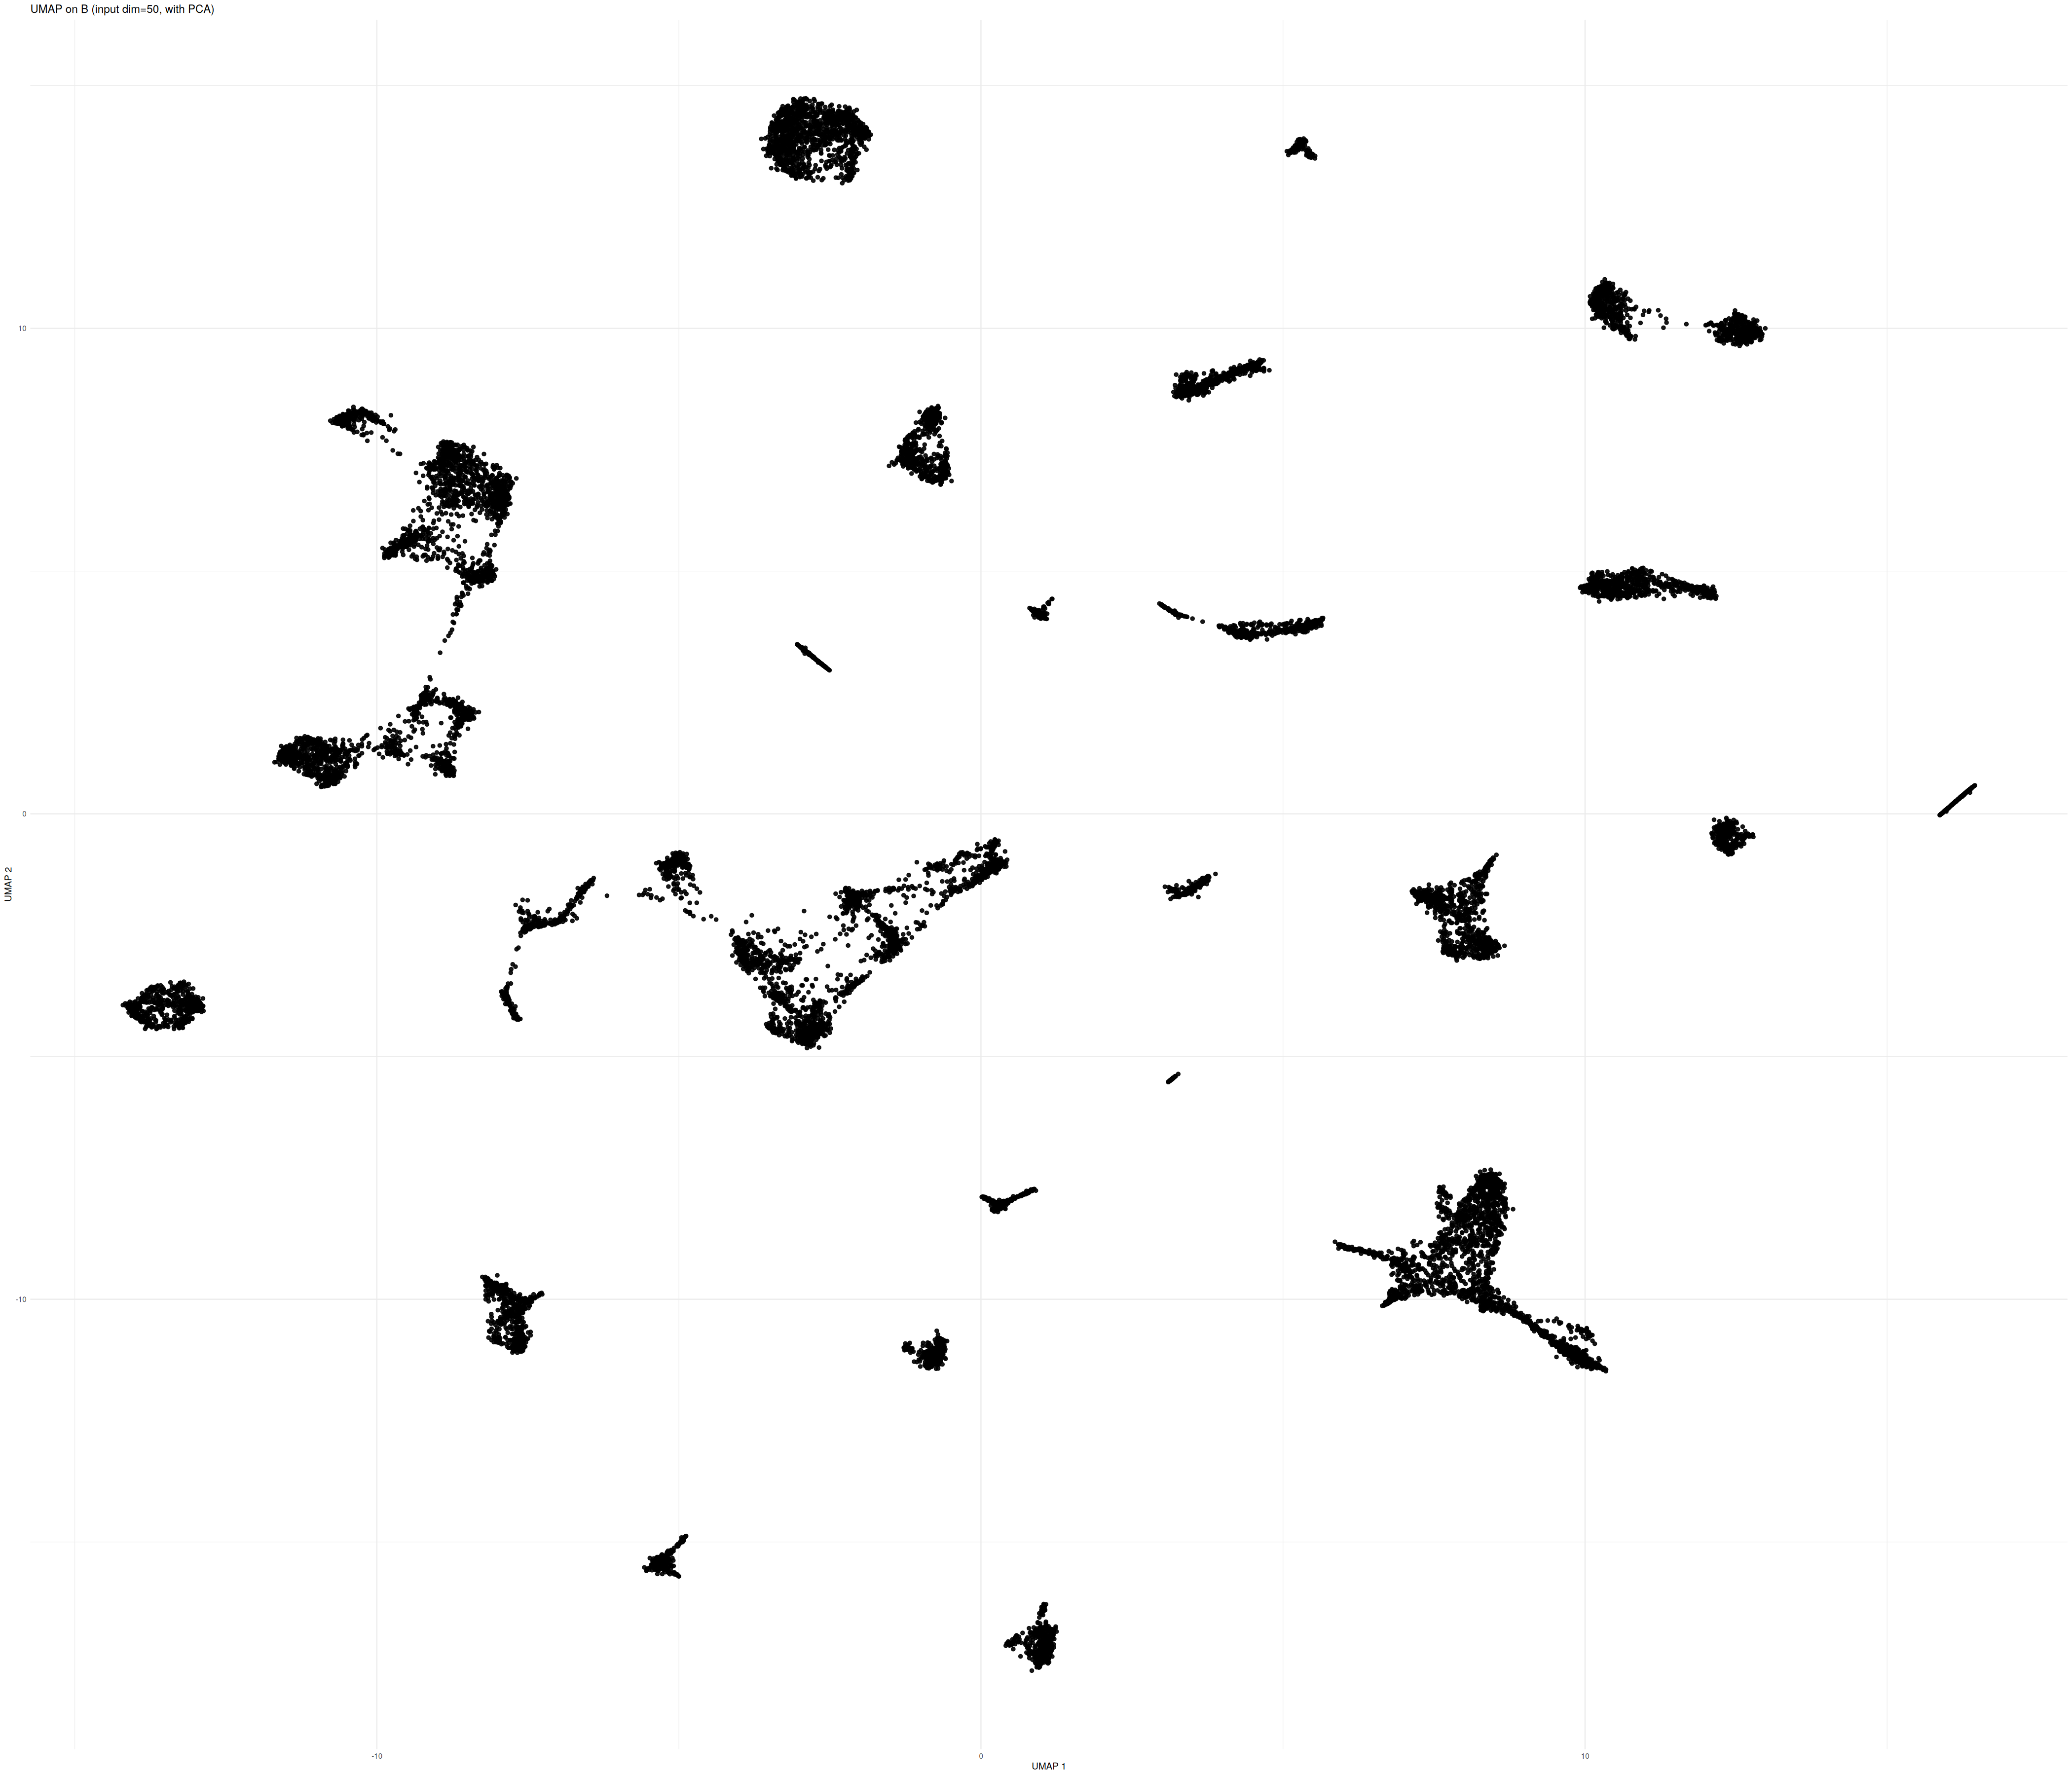

In [59]:
# === ZERO-DRAMA t-SNE/UMAP ON PLIER B ===
# - Uses ALL LVs from gtex_plier2$B (samples x LVs)
# - Scales safely (no division by zero)
# - Skips PCA when dims are too small (avoids SVD errors)
# - Guards perplexity / neighbors to valid ranges

library(ggplot2)
library(Rtsne)
library(uwot)

stopifnot(exists("gtex_plier2"), !is.null(gtex_plier2$B))

# 1) Build samples x LVs matrix
B <- gtex_plier2$B               # LVs x samples
X <- t(B)                        # samples x LVs
rn <- rownames(X)
if (is.null(rn)) rn <- paste0("s", seq_len(nrow(X)))
rownames(X) <- make.unique(rn)

# Align meta if present
if (exists("meta")) {
  common <- intersect(rownames(X), rownames(meta))
  if (length(common) >= 3) {
    X    <- X[common, , drop = FALSE]
    meta <- meta[common, , drop = FALSE]
  }
}

# 2) Safe scaling (do NOT drop to zero dims)
center_scale <- function(M) {
  if (!is.matrix(M)) M <- as.matrix(M)
  if (ncol(M) == 0 || nrow(M) == 0) return(M)
  mu  <- suppressWarnings(colMeans(M, na.rm = TRUE))
  M   <- sweep(M, 2, mu, "-")
  sds <- suppressWarnings(apply(M, 2, sd))
  sds[!is.finite(sds) | sds == 0] <- 1
  sweep(M, 2, sds, "/")
}
X <- center_scale(X)

# 3) Decide whether to PCA
use_pca <- (nrow(X) >= 5 && ncol(X) >= 3)
if (use_pca) {
  # Guarded PCA (no internal scaling/centering)
  pca <- prcomp(X, center = FALSE, scale. = FALSE)
  if (ncol(pca$x) >= 2) {
    pcs <- pca$x[, seq_len(min(50, ncol(pca$x))), drop = FALSE]
  } else {
    pcs <- X  # fallback if PCA collapses
  }
} else {
  pcs <- X
}

# 4) Guarded params for t-SNE/UMAP
n <- nrow(pcs)
if (n < 3) stop("Not enough samples (n<3) for embedding.")
input_dim <- ncol(pcs)
if (input_dim < 1) stop("Input has zero features after preprocessing.")

perp_max <- floor((n - 1) / 3)
perp <- max(5, min(30, perp_max))
if (!is.finite(perp) || perp < 5) perp <- max(2, min(5, n - 2))  # tiny-n fallback

nn <- max(2, min(50, n - 1))
min_dist <- 0.15

set.seed(42)

# 5) t-SNE (with safe fallbacks)
ts <- tryCatch(
  Rtsne(pcs,
        perplexity = perp,
        check_duplicates = FALSE,
        pca = FALSE,
        learning_rate = max(200, n/12),
        theta = 0.5,
        max_iter = 2000),
  error = function(e) {
    # ultra-conservative retry
    Rtsne(pcs,
          perplexity = max(2, min(5, n - 2)),
          check_duplicates = FALSE,
          pca = FALSE,
          learning_rate = 200,
          theta = 0.5,
          max_iter = 1500)
  }
)
tsne_df <- data.frame(sample = rownames(pcs),
                      tsne1 = ts$Y[,1],
                      tsne2 = ts$Y[,2],
                      row.names = rownames(pcs))

# 6) UMAP (guard neighbors)
um <- umap(pcs,
           n_neighbors = nn,
           min_dist = min_dist,
           metric = "euclidean",
           n_components = 2,
           init = "spectral",
           fast_sgd = TRUE)
umap_df <- data.frame(sample = rownames(pcs),
                      umap1 = um[,1],
                      umap2 = um[,2],
                      row.names = rownames(pcs))

# 7) Merge meta if available
if (exists("meta")) {
  tsne_df <- cbind(tsne_df, meta[rownames(tsne_df), , drop = FALSE])
  umap_df <- cbind(umap_df, meta[rownames(umap_df), , drop = FALSE])
}

# choose color column if available
color_col <- if (exists("meta")) {
  cc <- intersect(c("Condition","Batch","Group","status","diagnosis"), colnames(tsne_df))
  if (length(cc)) cc[1] else NULL
} else NULL

p_tsne <- ggplot(tsne_df, aes(tsne1, tsne2)) +
  { if (!is.null(color_col)) aes_string(color = color_col) else aes() } +
  geom_point(size = 1.6, alpha = 0.9) +
  labs(title = sprintf("t-SNE on B (input dim=%d%s)", input_dim, if (use_pca) ", with PCA" else ""),
       x = "t-SNE 1", y = "t-SNE 2") +
  theme_minimal()

p_umap <- ggplot(umap_df, aes(umap1, umap2)) +
  { if (!is.null(color_col)) aes_string(color = color_col) else aes() } +
  geom_point(size = 1.6, alpha = 0.9) +
  labs(title = sprintf("UMAP on B (input dim=%d%s)", input_dim, if (use_pca) ", with PCA" else ""),
       x = "UMAP 1", y = "UMAP 2") +
  theme_minimal()

print(p_tsne); print(p_umap)


In [39]:
gtex_summary_sig_col  <- gtex_summary_sig  %>% 
group_by(LV) %>%
summarise(pathway = paste(pathway, collapse = '; '))

In [41]:
best_LV_by_tissue %>%
    dplyr::inner_join(unique(gtex_summary_sig_col))

Joining with `by = join_by(LV)`


tissue         LV   
1  Adipose Tissue LV29 
2  Muscle         LV47 
3  Blood Vessel   LV81 
4  Heart          LV35 
5  Breast         LV35 
6  Skin           LV31 
7  Brain          LV71 
8  Adrenal Gland  LV59 
9  Thyroid        LV195
10 Lung           LV187
11 Spleen         LV43 
12 Pancreas       LV25 
13 Esophagus      LV197
14 Stomach        LV56 
15 Colon          LV26 
16 Prostate       LV56 
17 Testis         LV76 
18 Nerve          LV101
19 Blood          LV187
20 Pituitary      LV35 
21 Liver          LV71 
   pathway                                                                                                                                                                                                                                                                                                                                                                                                                                                     
1  Lung Male 50-59 Up; Lung Male 60-69 Up; Lung Female 60-69 Up; Lung Male 30-39 Up; Lung Female 50-59 Up; Lung Male 20-29 Up; Lung Male 40-49 Up; Lung Female 20-29 Up; Lung Female 70-79 Up                                                                                                                                                                                                                                                                  
2  Muscle - Skeletal Male 20-29 Up; Aerobic Electron Transport Chain (GO:0019646); Aerobic Respiration (GO:0009060); Cellular Respiration (GO:0045333); Mitochondrial ATP Synthesis Coupled Electron Transport (GO:0042775); Mitochondrial Gene Expression (GO:0140053); Mitochondrial Translation (GO:0032543); Oxidative Phosphorylation (GO:0006119); Proton Motive Force-Driven Mitochondrial ATP Synthesis (GO:0042776); Oxidative Phosphorylation        
3  Esophagus - Muscularis Female 50-59 Up; Artery - Tibial Male 50-59 Up; Esophagus - Muscularis Female 20-29 Up; Esophagus - Gastroesophageal Junction Female 20-29 Up; Colon - Sigmoid Female 20-29 Up; Esophagus - Muscularis Male 30-39 Up; Artery - Tibial Male 30-39 Up; Esophagus - Muscularis Female 30-39 Up; Artery - Tibial Male 20-29 Up                                                                                                           
4  Fallopian Tube Female 50-59 Up; Embryonic Skeletal System Development (GO:0048706); Embryonic Skeletal System Morphogenesis (GO:0048704)                                                                                                                                                                                                                                                                                                                    
5  Fallopian Tube Female 50-59 Up; Embryonic Skeletal System Development (GO:0048706); Embryonic Skeletal System Morphogenesis (GO:0048704)                                                                                                                                                                                                                                                                                                                    
6  Breast - Mammary Tissue Female 60-69 Up; Minor Salivary Gland Female 60-69 Up; Minor Salivary Gland Male 60-69 Up; Breast - Mammary Tissue Female 20-29 Up; Breast - Mammary Tissue Female 50-59 Up; Breast - Mammary Tissue Female 30-39 Up; Minor Salivary Gland Male 20-29 Up; Breast - Mammary Tissue Female 40-49 Up; Minor Salivary Gland Female 50-59 Up                                                                                             
7  Brain - Spinal Cord (Cervical C-1) Male 50-59 Up; Brain - Substantia Nigra Male 50-59 Up; Brain - Substantia Nigra Female 60-69 Up; Brain - Spinal Cord (Cervical C-1) Female 60-69 Up; Brain - Substantia Nigra Male 60-69 Up; Brain - Substantia Nigra Female 40-49 Up; Brain - Spinal Cord (Cervical C-1) Female 40-49 Up; Brain - Substantia